In [172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [173]:
import io

In [174]:
from google.colab import files
uploaded = files.upload()

Saving CELH.csv to CELH.csv


In [176]:
df = pd.read_csv(io.BytesIO(uploaded['CELH.csv']))
print(df)

           Date      Open      High       Low     Close  Adj Close   Average
0      1/4/2010  1.666667  1.683333  1.666667  1.666667   1.666667  1.670000
1      1/5/2010  1.666667  1.796667  1.500000  1.790000   1.790000  1.708667
2      1/6/2010  1.816667  1.816667  1.666667  1.783333   1.783333  1.773333
3      1/7/2010  1.683333  1.783333  1.683333  1.683333   1.683333  1.703333
4      1/8/2010  1.700000  1.776667  1.586667  1.773333   1.773333  1.722000
...         ...       ...       ...       ...       ...        ...       ...
2635  6/23/2020  3.426667  3.816667  3.386667  3.700000   3.700000  3.606000
2636  6/24/2020  3.603333  3.803333  3.430000  3.480000   3.480000  3.559333
2637  6/25/2020  3.483333  3.790000  3.433333  3.786667   3.786667  3.656000
2638  6/26/2020  3.803333  3.993333  3.570000  3.680000   3.680000  3.745333
2639  6/29/2020  3.680000  3.880000  3.503333  3.853333   3.853333  3.754000

[2640 rows x 7 columns]


In [177]:
data_training = df[df['Date'] < '2020-03-15'].copy()
data_testing = df[df['Date'] >= '2020-03-15'].copy()

In [178]:
data_training = data_training.drop(['Date'], axis = 1)

In [179]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.77849121, 0.70503573, 0.78640777, 0.77106522, 0.77106522,
        0.7629514 ],
       [0.77849121, 0.75395687, 0.70550146, 0.82988858, 0.82988858,
        0.78116173],
       [0.85072234, 0.76258996, 0.78640777, 0.82670877, 0.82670877,
        0.81161696],
       ...,
       [0.93739969, 0.90935253, 0.94012913, 1.        , 1.        ,
        0.95886977],
       [0.99678957, 0.89496376, 0.95469223, 0.96502353, 0.96502353,
        0.95635777],
       [0.94863548, 0.85899268, 0.85760485, 0.91573912, 0.91573912,
        0.90078487]])

In [180]:
x_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    x_train.append(data_training[i-20:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [181]:
x_train.shape

(1008, 20, 6)

In [182]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [183]:
regressorGRU = Sequential()

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 6)))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 80, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 120, activation = 'relu'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(Dense(units = 1))

In [184]:
regressorGRU.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_28 (GRU)                (None, 20, 60)            12240     
                                                                 
 dropout_28 (Dropout)        (None, 20, 60)            0         
                                                                 
 gru_29 (GRU)                (None, 20, 60)            21960     
                                                                 
 dropout_29 (Dropout)        (None, 20, 60)            0         
                                                                 
 gru_30 (GRU)                (None, 20, 80)            34080     
                                                                 
 dropout_30 (Dropout)        (None, 20, 80)            0         
                                                                 
 gru_31 (GRU)                (None, 120)              

In [185]:
regressorGRU.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressorGRU.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
32/32 [==============================] - 8s 44ms/step - loss: 0.0411
Epoch 2/50
32/32 [==============================] - 1s 45ms/step - loss: 0.0053
Epoch 3/50
32/32 [==============================] - 1s 45ms/step - loss: 0.0042
Epoch 4/50
32/32 [==============================] - 1s 45ms/step - loss: 0.0043
Epoch 5/50
32/32 [==============================] - 1s 46ms/step - loss: 0.0040
Epoch 6/50
32/32 [==============================] - 1s 45ms/step - loss: 0.0033
Epoch 7/50
32/32 [==============================] - 2s 48ms/step - loss: 0.0033
Epoch 8/50
32/32 [==============================] - 2s 72ms/step - loss: 0.0041
Epoch 9/50
32/32 [==============================] - 1s 43ms/step - loss: 0.0047
Epoch 10/50
32/32 [==============================] - 1s 45ms/step - loss: 0.0032
Epoch 11/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0031
Epoch 12/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0028
Epoch 13/50
32/32 [==================

In [186]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close,Average
38,3/1/2010,1.133333,1.133333,1.093333,1.133333,1.133333,1.125333
39,3/2/2010,1.150000,1.150000,1.076667,1.100000,1.100000,1.115333
40,3/3/2010,1.116667,1.116667,1.066667,1.090000,1.090000,1.096000
41,3/4/2010,1.166667,1.166667,1.066667,1.086667,1.086667,1.114667
42,3/5/2010,1.133333,1.133333,1.016667,1.033333,1.033333,1.070000


In [187]:
past_20_days = data_testing.tail(20)

In [188]:
df = past_20_days.append(data_testing, ignore_index = True)
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-188-08f6f3976b94>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_20_days.append(data_testing, ignore_index = True)


,Open,High,Low,Close,Adj Close,Average
0,2.963333,3.026667,2.880000,2.963333,2.963333,2.959333
1,2.980000,3.023333,2.870000,2.936667,2.936667,2.949333
2,2.896667,3.090000,2.836667,3.060000,3.060000,2.988667
3,3.096667,3.270000,3.076667,3.223333,3.223333,3.178000
4,3.283333,3.403333,3.150000,3.183333,3.183333,3.240666


In [189]:
inputs = scaler.transform(df)
inputs

array([[1.40288886, 1.28489205, 1.37540437, 1.38950677, 1.38950677,
        1.37017258],
       [1.4109147 , 1.28345291, 1.37055   , 1.37678849, 1.37678849,
        1.3654631 ],
       [1.37078646, 1.31223003, 1.35436893, 1.43561185, 1.43561185,
        1.38398746],
       ...,
       [1.6532901 , 1.61438826, 1.64401262, 1.78219383, 1.78219383,
        1.6982731 ],
       [1.80738318, 1.70215788, 1.71035583, 1.73131928, 1.73131928,
        1.74034525],
       [1.7479933 , 1.65323717, 1.6779932 , 1.81399001, 1.81399001,
        1.74442685]])

In [190]:
x_test = []
y_test = []

for i in range(20, inputs.shape[0]):
    x_test.append(inputs[i-20:i])
    y_test.append(inputs[i,0])

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((1572, 20, 6), (1572,))

In [191]:
x_test.shape

(1572, 20, 6)

In [192]:
y_pred = regressorGRU.predict(x_test)

50/50 [==============================] - 2s 20ms/step


In [193]:
scaler.scale_

array([0.48154085, 0.43165461, 0.48543689, 0.47694746, 0.47694746,
       0.4709576 ])

In [194]:
scale = 1 / 0.48154085
scale

2.0766670158928364

In [195]:
y_pred = y_pred * scale
y_test = y_test * scale

In [196]:
y_pred.shape

(1572, 1)

In [197]:
y_test.shape

(1572,)

In [198]:
y_pred[1503:]

array([[1.0916494],
       [1.0870749],
       [1.0904456],
       [1.073073 ],
       [1.0694829],
       [1.0747811],
       [1.0819662],
       [1.0922061],
       [1.0765091],
       [1.0558748],
       [1.0430424],
       [1.0500835],
       [1.0624751],
       [1.0754044],
       [1.1141788],
       [1.1516217],
       [1.1817114],
       [1.1667722],
       [1.1417316],
       [1.1418973],
       [1.148422 ],
       [1.1418344],
       [1.159958 ],
       [1.1791608],
       [1.183262 ],
       [1.2060612],
       [1.2338579],
       [1.261671 ],
       [1.2824396],
       [1.2798828],
       [1.2620143],
       [1.2622228],
       [1.2476393],
       [1.2272041],
       [1.2576758],
       [1.3275142],
       [1.5117959],
       [1.5224543],
       [1.545078 ],
       [1.5936607],
       [1.663264 ],
       [1.8053665],
       [1.9028643],
       [1.9869661],
       [2.0751386],
       [2.2064073],
       [2.1789544],
       [2.148631 ],
       [2.1867373],
       [2.2074962],


In [199]:
y_test[1503:]

array([1.22666701, 1.44666701, 1.27666701, 1.24333301, 1.28333301,
       1.35000001, 1.32333301, 1.34333301, 1.24000001, 1.24000001,
       1.28666701, 1.30333301, 1.32333301, 1.35666701, 1.49333301,
       1.50000001, 1.47000001, 1.38333301, 1.39666701, 1.41333301,
       1.39666701, 1.44333301, 1.46666701, 1.47666701, 1.47333301,
       1.61000001, 1.61000001, 1.70333301, 1.61333301, 1.55666701,
       1.54666701, 1.57666701, 1.48333301, 1.48666701, 1.69666701,
       2.02000002, 2.06666702, 1.96666702, 2.07333302, 2.16666702,
       2.27666702, 2.59000002, 2.65666702, 2.80666702, 3.05000002,
       3.05333302, 2.92666702, 2.79666702, 3.07333302, 2.91333302,
       2.93000002, 2.84666702, 3.04666702, 3.23333302, 3.05666702,
       3.10333302, 2.99333302, 2.90000002, 2.90000002, 3.13666702,
       3.04000002, 3.10000002, 3.38000003, 3.33333303, 3.37666703,
       3.55333303, 3.43333303, 3.75333303, 3.63000003])

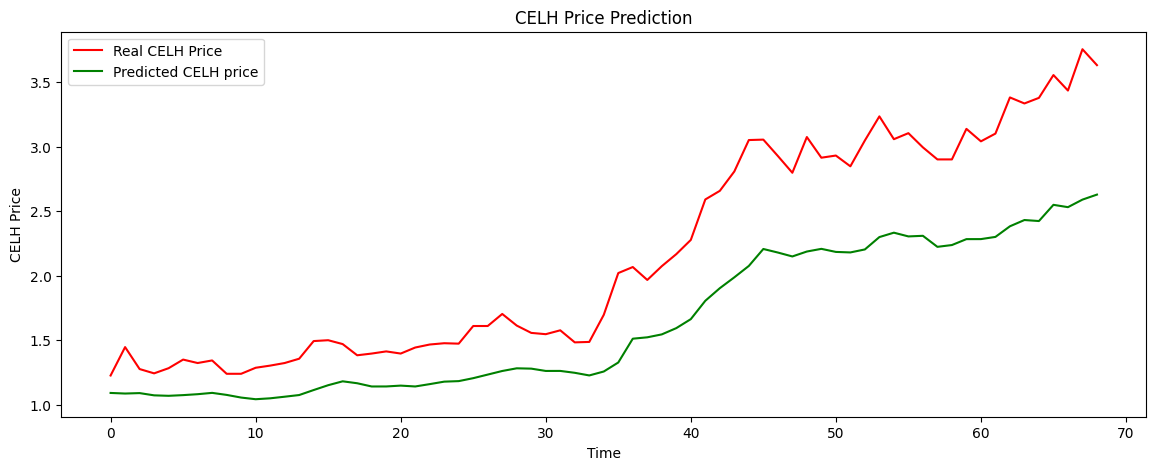

In [200]:
plt.figure(figsize = (14,5))
plt.plot(y_test[1503:], color = 'red', label = 'Real CELH Price')
plt.plot(y_pred[1503:], color = 'green', label = 'Predicted CELH price')
plt.title('CELH Price Prediction')
plt.xlabel('Time')
plt.ylabel('CELH Price')
plt.legend()
plt.show()